# PyTorch Neural Network for Iris Classification

This notebook demonstrates how to build, train, and evaluate a neural network using PyTorch for classifying iris flowers into three species: Setosa, Versicolor, and Virginica.

## Key Steps:
1. **Tensor Operations** - Explore PyTorch tensors and NumPy arrays
2. **Model Architecture** - Define a 3-layer feedforward neural network
3. **Data Preparation** - Load and preprocess the Iris dataset
4. **Training** - Train the model using backpropagation
5. **Evaluation** - Assess model performance on test data
6. **Model Persistence** - Save and load trained models

In [4]:
import torch 
import numpy as np

## 1. Exploring Tensors

Tensors are the fundamental data structure in PyTorch, similar to NumPy arrays but with GPU acceleration capabilities. Let's explore creating and manipulating tensors.

In [5]:
np1 = np.random.rand(3, 4)

In [6]:
np1

array([[0.13521072, 0.01773073, 0.53845441, 0.22749121],
       [0.9026339 , 0.66839121, 0.70438114, 0.3149068 ],
       [0.30102704, 0.68130521, 0.76876324, 0.18727751]])

In [7]:
tensor1 = torch.randn(3, 4)

In [8]:
tensor1

tensor([[-0.3180,  0.8603,  0.1164,  1.2303],
        [ 1.6997, -0.6510,  1.7786, -0.3316],
        [-1.0493,  0.3524, -0.0582, -1.0210]])

In [9]:
tensor_3d = torch.randn(2, 3, 4)

In [10]:
tensor_3d

tensor([[[ 0.4142,  1.1846,  0.8676,  2.1714],
         [-0.1408,  1.3582,  0.6860, -0.6637],
         [ 1.5524, -0.0243, -1.6658, -1.6487]],

        [[ 1.0030, -2.3411,  0.1145, -0.9308],
         [-0.0600,  1.5282, -0.0708,  1.3824],
         [ 0.0221, -0.9399, -0.2702,  1.7123]]])

## 2. Building the Neural Network Model

We'll create a custom neural network class that inherits from `nn.Module`. This model will have:
- **Input layer**: 4 features (sepal length, sepal width, petal length, petal width)
- **Hidden layer 1**: 8 neurons with ReLU activation
- **Hidden layer 2**: 9 neurons with ReLU activation  
- **Output layer**: 3 neurons (one for each iris species)

In [11]:
import torch.nn as nn
import torch.nn.functional as F

In [59]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()

        # fc -- fully connected layer
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [60]:
torch.manual_seed(41)

model = Model()
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

## 3. Loading the Iris Dataset

The Iris dataset contains 150 samples of iris flowers with 4 features each. We'll load it from a CSV file and prepare it for training.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
my_df = pd.read_csv(url)

In [63]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Data Preprocessing

Convert species names to numeric labels:
- Setosa → 0
- Versicolor → 1
- Virginica → 2

This is required because neural networks work with numerical data.

In [64]:
my_df['species'] = my_df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [65]:
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [66]:
X = my_df.drop('species', axis=1).values
y = my_df['species'].values

In [67]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Train-Test Split

Split the data into training (80%) and testing (20%) sets. The training set is used to teach the model, while the test set evaluates how well it generalizes to unseen data.

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [70]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [71]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

## 4. Training Setup

**Loss Function (Criterion)**: `CrossEntropyLoss` - measures how far predictions are from actual labels

**Optimizer**: `Adam` - adjusts model weights to minimize loss
- Learning rate: 0.01 - controls how big the weight updates are

In [72]:
# Error criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [73]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

## 5. Training the Model

The training loop performs the following steps for each epoch:
1. **Forward pass**: Pass training data through the model to get predictions
2. **Calculate loss**: Compare predictions with actual labels
3. **Backward pass**: Calculate gradients (how to adjust weights)
4. **Update weights**: Use optimizer to adjust model parameters

The loss should decrease over time as the model learns.

In [74]:
epochs = 100
losses = []

for i in range(epochs):
    # Go forward and get a prediction
    y_pred = model.forward(X_train)

    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())

    if i % 10 == 0:
        print(f"Epoch: {i} Loss: {loss}")

    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()    
   

Epoch: 0 Loss: 1.1251550912857056
Epoch: 10 Loss: 1.0096259117126465
Epoch: 20 Loss: 0.8157405853271484
Epoch: 30 Loss: 0.585706353187561
Epoch: 40 Loss: 0.3999636471271515
Epoch: 50 Loss: 0.26768800616264343
Epoch: 60 Loss: 0.17942361533641815
Epoch: 70 Loss: 0.12151690572500229
Epoch: 80 Loss: 0.0860118493437767
Epoch: 90 Loss: 0.06520850956439972


### Visualizing Training Progress

Plot the loss over epochs to see how quickly the model is learning. A decreasing trend indicates successful training.

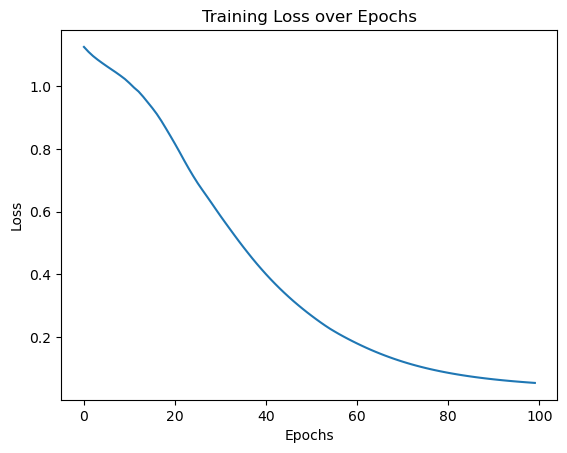

In [75]:
plt.plot(range(epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.show()

## 6. Model Evaluation

Evaluate the trained model on the test set to see how well it performs on data it hasn't seen during training.

`torch.no_grad()` disables gradient calculation, saving memory and computation since we're not training.

In [76]:
# Evaluate the model on the test data
with torch.no_grad():
    y_pred_test = model.forward(X_test)
    test_loss = criterion(y_pred_test, y_test)
    print(f"Test Loss: {test_loss}")

Test Loss: 0.13151279091835022


### Confusion Matrix

A confusion matrix shows how many samples were correctly classified versus misclassified for each species:
- **Diagonal elements**: Correct predictions
- **Off-diagonal elements**: Misclassifications
- **Rows**: Actual species
- **Columns**: Predicted species

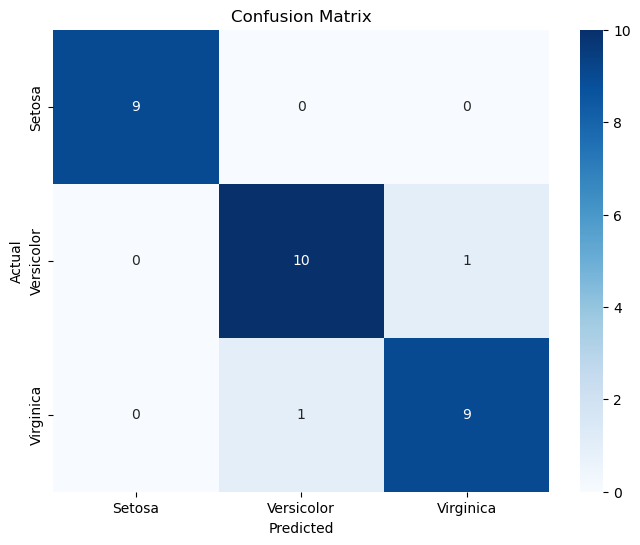

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions
with torch.no_grad():
    y_pred_test = model.forward(X_test)
    predictions = y_pred_test.argmax(dim=1)

# y_pred_test 

# Create confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [79]:
y_test

tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0,
        1, 1, 1, 1, 0, 1])

### Detailed Predictions

Examine individual test samples to see the model's predictions and compare them with actual labels.

In [36]:
test_loss

tensor(0.1315)

In [39]:
len(X_test)

30

In [42]:
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_pred = model.forward(data)
        print(y_pred)
        print(f"Test Sample {i} - Predicted: {y_pred.argmax().item()} Actual: {y_test[i].item()}")

tensor([-5.8760,  4.4628,  6.5124])
Test Sample 0 - Predicted: 2 Actual: 2
tensor([-7.5436,  4.1670,  9.7255])
Test Sample 1 - Predicted: 2 Actual: 2
tensor([-8.4504,  5.1271, 10.1987])
Test Sample 2 - Predicted: 2 Actual: 2
tensor([-4.3398,  5.6267,  2.5608])
Test Sample 3 - Predicted: 1 Actual: 1
tensor([-7.1825,  4.8754,  8.2992])
Test Sample 4 - Predicted: 2 Actual: 2
tensor([-3.3974,  5.3463,  1.2803])
Test Sample 5 - Predicted: 1 Actual: 1
tensor([-5.9231,  4.9822,  5.9997])
Test Sample 6 - Predicted: 2 Actual: 2
tensor([-4.2881,  5.7003,  2.3889])
Test Sample 7 - Predicted: 1 Actual: 1
tensor([-6.5356,  4.9257,  7.1260])
Test Sample 8 - Predicted: 2 Actual: 2
tensor([-8.0509,  4.4129, 10.3286])
Test Sample 9 - Predicted: 2 Actual: 2
tensor([-5.6762,  4.9500,  5.6215])
Test Sample 10 - Predicted: 2 Actual: 2
tensor([ 4.5662, -2.2476, -2.8911])
Test Sample 11 - Predicted: 0 Actual: 0
tensor([ 4.2571, -1.9967, -2.7330])
Test Sample 12 - Predicted: 0 Actual: 0
tensor([-2.1108,  4.05

In [43]:
new_iris = torch.tensor([5.1, 3.5, 1.4, 0.2])
new_iris

tensor([5.1000, 3.5000, 1.4000, 0.2000])

### Making Predictions on New Data

Test the model with a new iris flower sample. The model outputs raw logits, and we use `argmax()` to find the predicted class.

In [45]:
with torch.no_grad():
    new_iris_pred = model(new_iris)
new_iris_pred

tensor([ 4.7974, -2.4588, -2.9975])

## 7. Model Persistence

Save the trained model's weights so you can load and use it later without retraining.

**Saving**: `torch.save()` stores the model's state dictionary (all learned weights and biases)

**Loading**: Create a new model instance and load the saved weights with `load_state_dict()`

In [47]:
# Save model
torch.save(model.state_dict(), "my_iris_model.pt")

In [48]:
# Load model
loaded_model = Model()
loaded_model.load_state_dict(torch.load("my_iris_model.pt"))
loaded_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)